In [195]:
import pandas as pd
import joblib
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [196]:
# model = joblib.load("./model_pipe.joblib")

In [197]:
df = pd.read_csv("data/cleaned_data.csv")

#formatting
df.rename(columns = {'status_group':'status'}, inplace = True)
df['status'] = pd.Categorical(df['status'], ['functional','functional needs repair','non functional'])

### Map per class

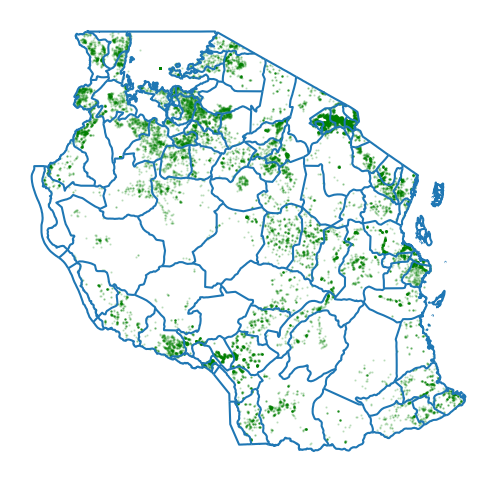

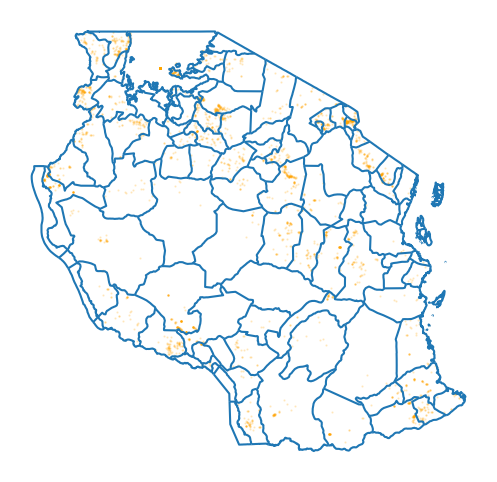

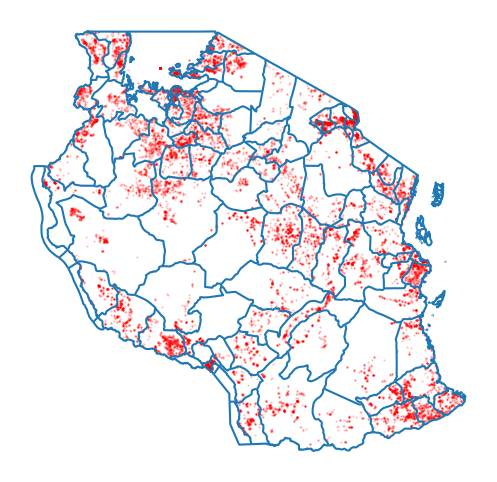

In [198]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdc = gpd.GeoDataFrame(df.copy(), geometry=geometry)
tan_map = gpd.read_file("data/maps/TAN_shapefile/TAN_boundaries.shp")
#tan_map.plot()
col = ["green", "orange", "red"]
for i, cls in enumerate(["functional", "functional needs repair", "non functional"]):
    P = gdc[gdc["status"] == cls].plot(ax=tan_map.plot(figsize=(10, 6)), marker='o', color=col[i], markersize=0.4, alpha = 0.2)
    P.set_facecolor((255/255,255/255,255/255))
    plt.axis('off')
    plt.grid(visible=False)
    plt.savefig(f'data/maps/tan_map-{cls}.png', transparent=True)
plt.show()

### Waterpoint_Type

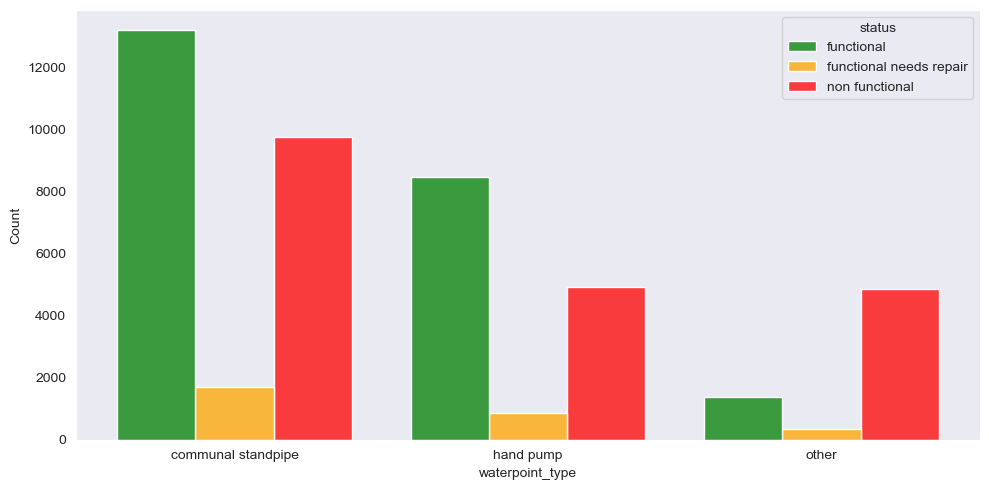

In [199]:
plt.figure(figsize=(10,5))
sns.histplot(data=df[df["waterpoint_type"].isin(df["waterpoint_type"].value_counts().index)], x="waterpoint_type", hue="status", multiple="dodge", shrink=0.8, palette=["g", "orange", "r"])
plt.grid(visible=False)
plt.tight_layout()
plt.savefig("data/waterpoint_type-distribution.png",transparent=True)
plt.show()

### Funder and Installer

Status distribution for the five "largest" funders (in terms of water pumps funded) and the five "largest" installers

funder


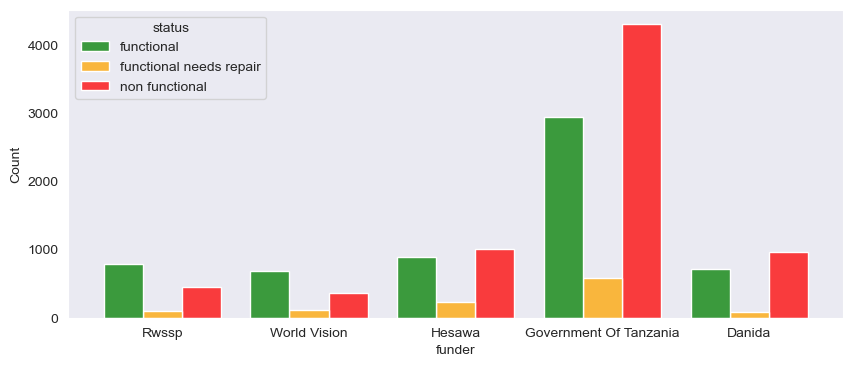

installer


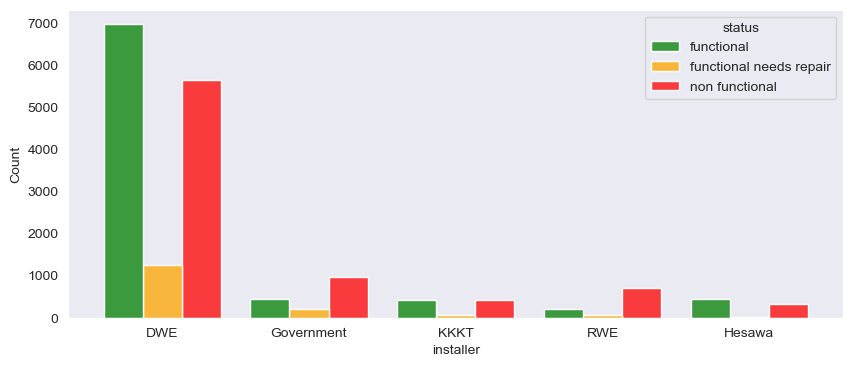

In [200]:
for att in ["funder", "installer"]:
    plt.figure(figsize=(10,4))
    sns.histplot(data=df[df[att].isin(df[att].value_counts()[:5].index)], x=att, hue="status", multiple="dodge", shrink=0.8, palette=["g", "orange", "r"])
    plt.grid(visible=False)
    plt.savefig(f"data/{att}-distribution.png",transparent=True)
    print(f"{att}")
    plt.show()

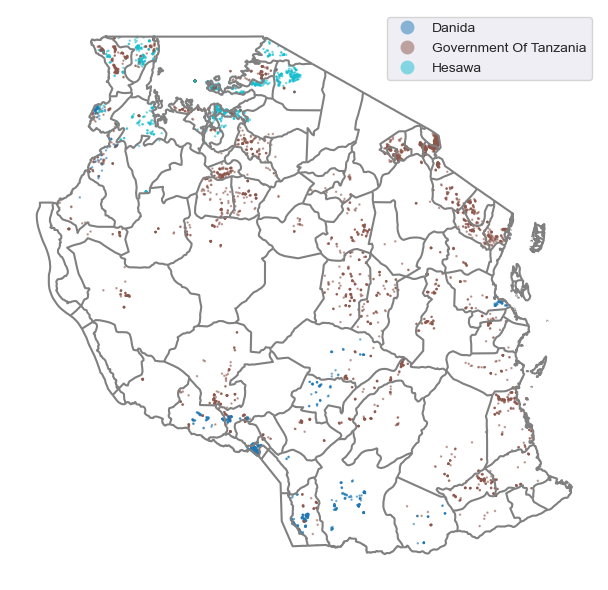

In [209]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdc = gpd.GeoDataFrame(df.copy(), geometry=geometry)
tan_map = gpd.read_file("data/maps/TAN_shapefile/TAN_boundaries.shp")

ax = tan_map.plot(figsize=(10, 6), color="grey")

gdc[(gdc["funder"].isin(["Hesawa", "Government Of Tanzania", "Danida"])) & (gdc["status"] == "non functional")].plot(ax=ax, column="funder", cmap='tab10', marker='o', markersize=0.6, alpha = 0.5, legend=True)
plt.axis('off')
plt.grid(visible=False)
plt.tight_layout()
plt.savefig(f'data/maps/tan_map-funder.png', transparent=True)
plt.show()

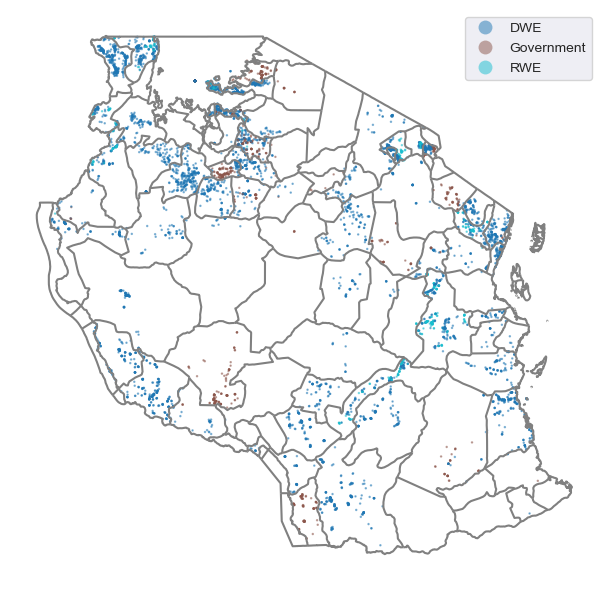

In [210]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdc = gpd.GeoDataFrame(df.copy(), geometry=geometry)
tan_map = gpd.read_file("data/maps/TAN_shapefile/TAN_boundaries.shp")

ax = tan_map.plot(figsize=(10, 6), color="grey")

gdc[(gdc["installer"].isin(["DWE", "Government", "RWE"])) & (gdc["status"] == "non functional")].plot(ax=ax, column="installer", cmap='tab10', marker='o', markersize=0.6, alpha = 0.5, legend=True)
plt.axis('off')
plt.grid(visible=False)
plt.tight_layout()
plt.savefig(f'data/maps/tan_map-installer.png', transparent=True)
plt.show()

### Basin

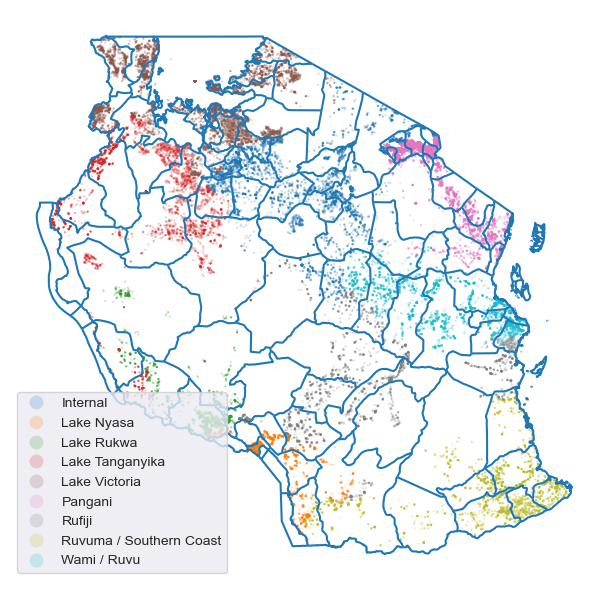

In [203]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdc = gpd.GeoDataFrame(df.copy(), geometry=geometry)
tan_map = gpd.read_file("data/maps/TAN_shapefile/TAN_boundaries.shp")

ax = tan_map.plot(figsize=(10, 6))

gdc.plot(ax=ax,column="basin", marker='o', markersize=0.4, alpha = 0.2, legend=True)
plt.axis('off')
plt.grid(visible=False)
plt.tight_layout()
plt.savefig(f'data/maps/tan_map-basin.png', transparent=True)
plt.show()

### Quantity

Distribution Histplot

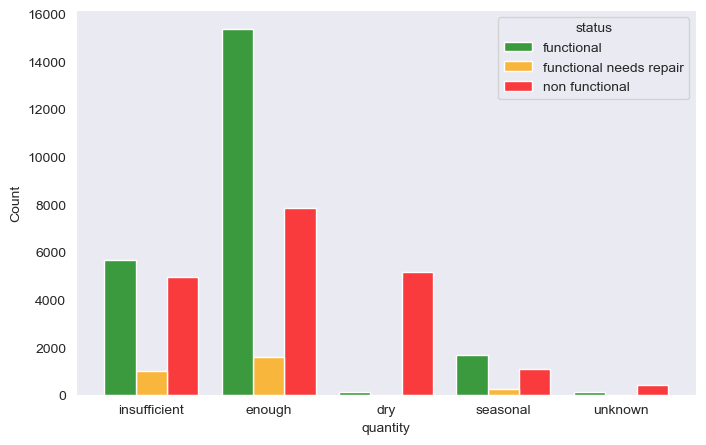

In [204]:
plt.figure(figsize=(8,5))
sns.histplot(data=df[df["quantity"].isin(df["quantity"].value_counts()[:5].index)], x="quantity", hue="status", multiple="dodge", shrink=0.8, palette=["g", "orange", "r"])
plt.grid(visible=False)
plt.savefig("data/Quantity-distribution.png",transparent=True)
plt.show()

Water quantity distribution

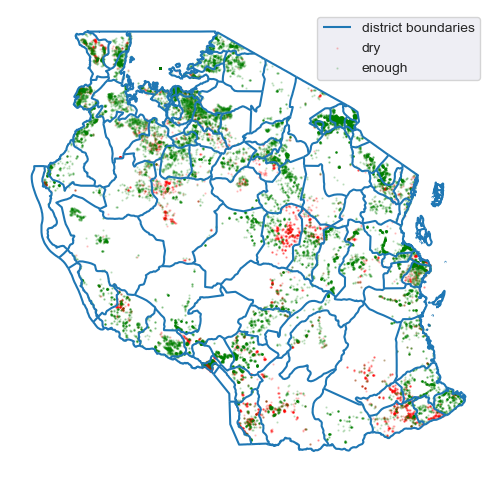

In [205]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdc = gpd.GeoDataFrame(df.copy(), geometry=geometry)
tan_map = gpd.read_file("data/maps/TAN_shapefile/TAN_boundaries.shp")

ax = tan_map.plot(figsize=(10, 6))

gdc[gdc["quantity"] == "dry"].plot(ax=ax,marker='o', color='red', markersize=0.4, alpha = 0.2)

gdc[gdc["quantity"] == "enough"].plot(ax=ax, marker='o', color='green', markersize=0.4, alpha = 0.2)

plt.legend(["district boundaries", "dry", "enough"])
plt.axis('off')
plt.grid(visible=False)
plt.savefig(f'data/maps/tan_map-quantity.png', transparent=True)
plt.show()

"Dry waterplaces vs Rivers" plot

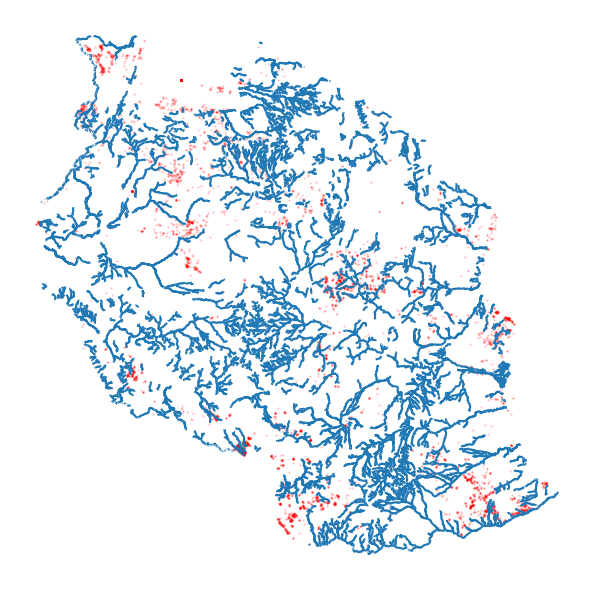

In [206]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdc = gpd.GeoDataFrame(df.copy(), geometry=geometry)
tan_map = gpd.read_file("data/maps/TAN_river_shapefile/AFRICOVER_TZ_RIVERS.shp")

ax = tan_map.plot(figsize=(10, 6), color="grey")

gdc[gdc["quantity"] == "dry"].plot(ax=ax,marker='o', color='red', markersize=0.4, alpha = 0.2)

plt.axis('off')
plt.grid(visible=False)
plt.tight_layout()
plt.savefig(f'data/maps/tan_map-quantity_rivers.png', transparent=True)
plt.show()

### Payment Type

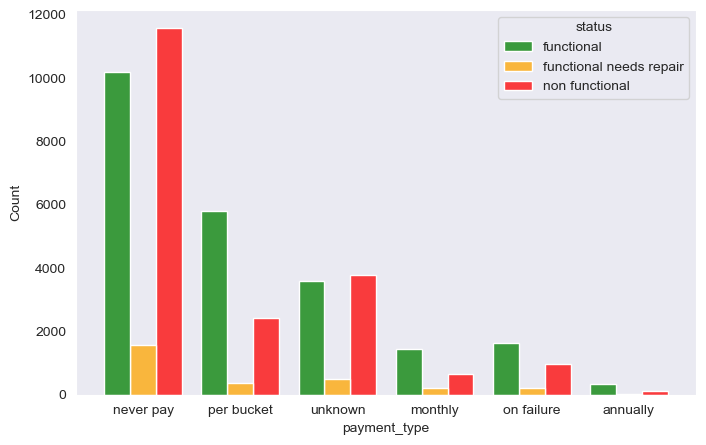

In [207]:
plt.figure(figsize=(8,5))
sns.histplot(data=df[df["payment_type"].isin(df["payment_type"].value_counts().index)], x="payment_type", hue="status", multiple="dodge", shrink=0.8, palette=["g", "orange", "r"])
plt.grid(visible=False)
plt.savefig("data/Payment-distribution.png",transparent=True)
plt.show()